In [ ]:
#this is Python
#importing
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
#loading file
df = pd.read_csv("Impact_of_Remote_Work_on_Mental_Health.csv")

#data cleaning
df = df.dropna(subset=["Stress_Level"])
df.drop("Employee_ID", axis=1, inplace=True)

#encoding and dummy variables
categorical_columns = [
    "Gender",
    "Job_Role",
    "Industry",
    "Work_Location",
    "Mental_Health_Condition",
    "Access_to_Mental_Health_Resources",
    "Productivity_Change",
    "Satisfaction_with_Remote_Work",
    "Physical_Activity",
    "Sleep_Quality",
    "Region",
]
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
#using map() to manually map the column Access_to_Mental_Health_Resources and the target variable column
#source(https://www.includehelp.com/python/change-a-column-of-yes-or-no-to-1-or-0-in-a-pandas-dataframe.aspx)
df["Stress_Level"] = df["Stress_Level"].map({
    "Low": 0,
    "Medium": 1,
    "High": 2
})



0.389
0.331


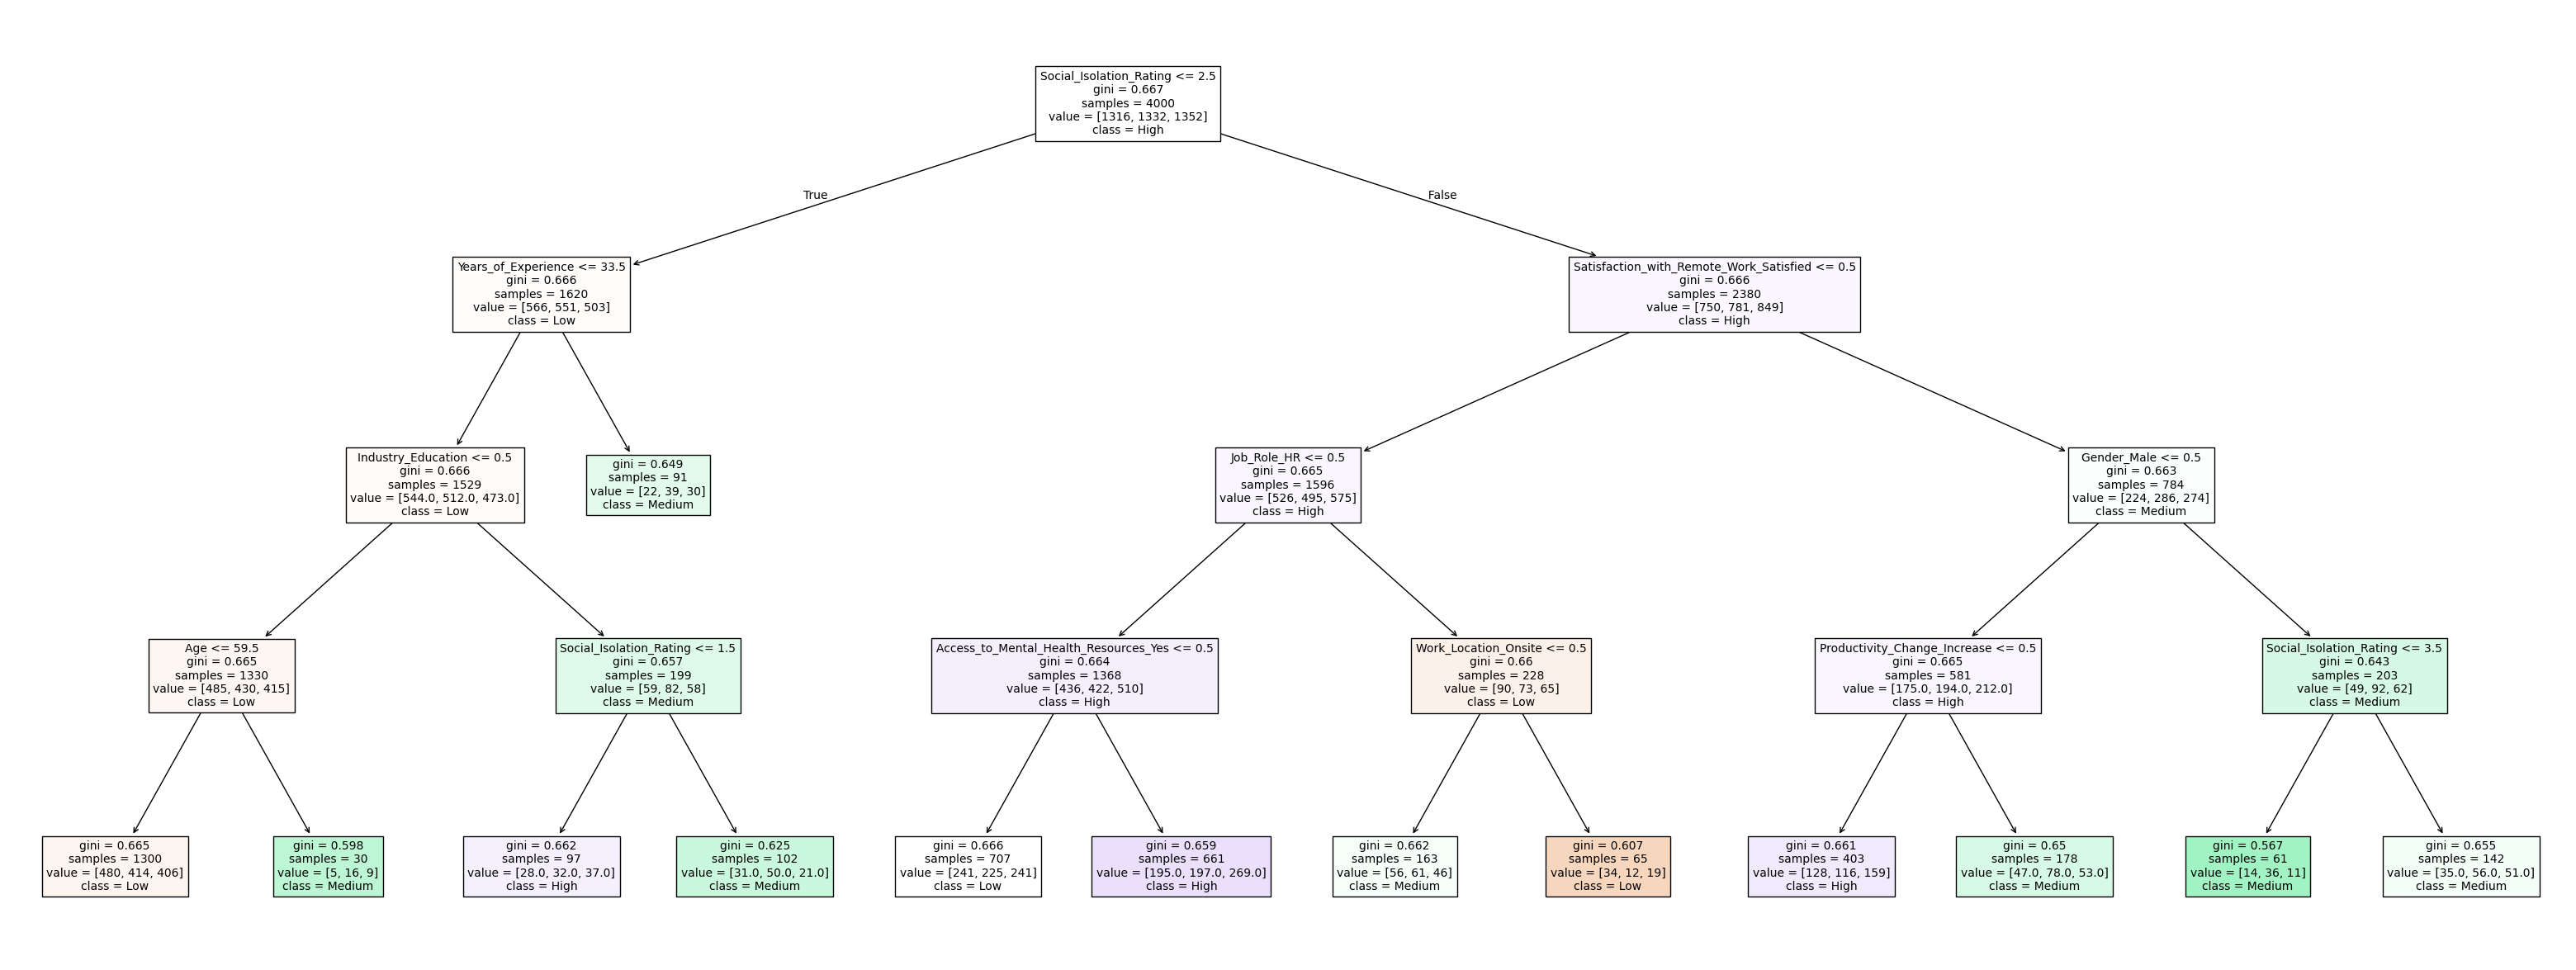

In [ ]:
#splitting data for the decision tree
i_vars = [i for i in df.columns if i != "Stress_Level"]
dep = "Stress_Level"
X = df[i_vars] #predicting variables
Y = df[dep] #target variables
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#decision tree
model = DecisionTreeClassifier(max_depth=4, min_samples_split=150)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
from sklearn import tree
fig = plt.figure(figsize = (40, 15))
tree.plot_tree(model, feature_names=X_train.columns, class_names=['Low', 'Medium','High'], filled=True, fontsize=10) #font size source (https://stackoverflow.com/questions/69604461/increase-the-size-of-nodes-in-decision-tree)
plt.show()

In [ ]:

#this is R
#importing data
data <- read.csv("Impact_of_Remote_Work_on_Mental_Health.csv", header = TRUE)
#data cleaning/filtering
#dataset has no missing columns (source: https://www.geeksforgeeks.org/how-to-find-and-count-missing-values-in-r-dataframe/)
colSums(is.na(data))
#filtering data for only remotw workers included
data_remote <- data %>% filter(Work_Location == "Remote")
#I want to split up the average hours based off their status of their work hour
#classification
data_full_time <- data %>%
  filter(Hours_Worked_Per_Week >= 35 & Hours_Worked_Per_Week <= 40)
data_over_time <- data %>%
  filter(Hours_Worked_Per_Week > 40)
data_part_time <- data %>%
  filter(Hours_Worked_Per_Week <= 20)
data_mid_time <- data %>%
  filter(Hours_Worked_Per_Week > 20 & Hours_Worked_Per_Week < 35)

#data visualizations

#questions 1
#bar plot for stress level work location.
#position = "dodge is essential because it separates the bar graph which makes it
#better to distinguish the differences in my opinion. The stacked bar graph makes
#it harder to compare
#i'm only using bar plots because a lot of the data in my dataset is categorical, especially the key data points
ggplot(data = data, aes(x = Work_Location, fill = Stress_Level)) +
  geom_bar(position = "dodge") +
  labs(title = "Stress Levels by Work Location", x = "Work Location", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
table_stress_location <- data %>%
  count(Work_Location, Stress_Level)

#bar plot for stress level by job role and work location. stress is categorical so bar plot is more effective
#i used the cheat sheet for facet_wrap and to create horizontal x-axis (https://www.andrewheiss.com/blog/2022/06/23/long-labels-ggplot/)
#this is a grouped bar graph for stress level by job role and work location
#facet wrap is helpful is splitting up and comparing stress levels across each industry
#i needed to tilt the x axis labels because they are very long
ggplot(data = data, aes(x = Job_Role, fill = Stress_Level)) +
  geom_bar(position = "dodge") +
  facet_wrap(~ Work_Location) +
  labs(title = "Stress Levels by Job Role and Work Location", x = "Job Role", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#question 2
#bar plot of satisfaction of employees of remote work arrangements by industry by work location
ggplot(data = data, aes(x = Industry, fill = Satisfaction_with_Remote_Work)) +
  geom_bar(position = "dodge") +
  facet_wrap(~ Work_Location) +
  labs(title = "Satisfaction Levels by Industry and Work Location", x = "Industry", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
#bar plot comparing satisfaction or remote work arrangements by work location
ggplot(data = data, aes(x = Work_Location, fill = Satisfaction_with_Remote_Work)) +
  geom_bar(position = "dodge") +
  labs(title = "Satisfaction Levels by Work Location", x = "Work Location", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#question 3
#bbar plot for productivity by job role and work location
ggplot(data = data, aes(x = Job_Role, fill = Productivity_Change)) +
  geom_bar(position = "dodge") +
  facet_wrap(~ Work_Location) +
  labs(title = "Productivity Levels by Job Role and Work Location", x = "Job Role", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
# Stacked bar plot for productivity by work location
ggplot(data = data, aes(x = Work_Location, fill = Productivity_Change)) +
  geom_bar(position = "dodge") +
  labs(title = "Productivity Levels by Work Location", x = "Work Location", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#question 4
#bar plot for mental health condition by work location by industry
ggplot(data = data, aes(x = Industry, fill = Mental_Health_Condition)) +
  geom_bar(position = "dodge") +
  facet_wrap(~ Work_Location) +
  labs(title = "Mental Health Outcomes by Industry and Work Location", x = "Industry", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#bar plot for mental health condition by work location
ggplot(data = data, aes(x = Work_Location, fill = Mental_Health_Condition)) +
  geom_bar(position = "dodge") +
  labs(title = "Mental Health Outcomes by Work Location", x = "Work Location", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#comparing hours worked
ggplot() +
  geom_bar(data = data_full_time, aes(x = "Full-Time", fill = Mental_Health_Condition), position = "dodge") +
  geom_bar(data = data_over_time, aes(x = "Overtime", fill = Mental_Health_Condition), position = "dodge") +
  geom_bar(data = data_part_time, aes(x = "Part-Time", fill = Mental_Health_Condition), position = "dodge") +
  geom_bar(data = data_mid_time, aes(x = "Mid-Time", fill = Mental_Health_Condition), position = "dodge") +
  labs(title = "Mental Health Condition by Work Intensity", x = "Work Intensity", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Bar plot for Mental Health Condition by Work Intensity and Work Location using filtered data
ggplot() +
  geom_bar(data = data_full_time, aes(x = "Full-Time", fill = Mental_Health_Condition), position = "dodge") +
  geom_bar(data = data_over_time, aes(x = "Overtime", fill = Mental_Health_Condition), position = "dodge") +
  geom_bar(data = data_part_time, aes(x = "Part-Time", fill = Mental_Health_Condition), position = "dodge") +
  geom_bar(data = data_mid_time, aes(x = "Mid-Time", fill = Mental_Health_Condition), position = "dodge") +
  facet_wrap(~ Work_Location) +
  labs(title = "Mental Health Condition by Work Intensity and Work Location", x = "Work Intensity", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
